In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Create a set of random latitude and longitude combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [4]:
# Add the latitude and longitudes to a list
coordinates=list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

-68.93979721819265 -122.37824347212315
20.982744234795135 -170.82597395145916
84.6559298537519 -29.359231157371283
-26.875598316990377 56.598625481814025
46.07190877370641 33.511592513729084
-21.866486839311094 -86.66478800342827
-51.59157884981973 60.403883655532695
-56.44147149323011 122.67183369272402
47.462053835224424 -10.34067896733194
-40.456474054994445 104.28294239693281
-53.033542494742036 96.19399992664881
6.930881665069265 20.42896258719165
52.72766733034612 -148.0403396835415
66.7038237024141 117.45622163717121
79.78260507913555 18.475677392183684
-15.936786032813856 143.09914217900462
88.00076459404013 -160.34795410536134
46.510386606013554 -34.971302001768805
34.668831805272276 -151.75885040523227
-37.544626777931654 -90.80883894782842
-70.78089314214617 39.15543611569083
-23.387584233592463 -5.568534281129359
0.6874401176604579 -43.87112258785231
-9.84162465927919 123.59367188726247
-34.83456443303869 26.407479016689337
-28.038550438905922 -165.04602903547885
-23.318266

34.79712286988115 -117.51483333562629
-73.912414048474 -68.75324682513566
2.754420824023299 -156.81668697032137
12.083793257515694 -174.3563011431204
-54.0961067761935 172.33777938153833
88.81263786248277 -101.6358006134836
-80.23801633621643 120.04662824890818
63.560414424466074 22.233641447374936
-14.451787193085082 -37.281948759156336
84.81572840046795 112.95030719427535
-78.02653159369953 138.86356563600685
38.03828319167107 -4.581577060106127
43.86985160239087 98.33435344965972
-59.7404621288576 131.48374743869215
-0.23691943363377277 83.75493224611051
-76.32672159270166 -30.50155551911098
-89.19127003072627 140.5008779072283
-4.031461406662729 -156.9499971967969
-23.866188777812113 -147.48200637360026
-88.272712224814 -4.68997608177304
55.15364974817234 29.310076397821433
-66.06118643302666 -138.31863900366713
71.03006277874763 -17.970389908420543
18.277160569959065 -19.745947475578618
70.59775924113745 -83.32613324533317
79.82244473486983 -87.00583955362079
18.806682848127636 30

-85.51095949189795 96.17239907332743
-24.15506229508624 -22.439092254096295
6.344330318084985 -155.85684605385612
40.33528003608117 173.66096214080005
-6.035806469759905 174.64595557879346
31.869270846105138 154.58424465374748
-75.79002252477024 -165.37656393896253
76.69481975712517 129.4418432780135
88.12683427941215 97.21156167223131
-4.405944816899165 -75.53221096593482
23.77274519654965 177.01727864335265
47.076011317340004 90.2078312599997
22.727032781450006 -56.49109295279416
47.39228547122741 -152.81950462343727
-53.36530347615353 -95.98160930542001
-58.40831205061074 104.99094983426681
61.19121832349299 37.17768306399259
2.362379896627459 124.86623922289476
-6.23126540628239 144.97242714223654
-56.78855548718082 -18.09673122077689
-41.117971277294956 175.0164969879724
-47.64191378816611 168.89143976981347
-89.6961141928801 -17.74238101622933
-51.18561327022479 2.831217220633164
18.376119126635217 -67.80308617625404
-39.895934991682644 154.68534440446103
-31.47510930781724 -23.0

In [6]:
from citipy import citipy
# Create a list for holding the cities
cities=[]
# Identify the nearest city for each latitude and longitude combinations
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities lsit
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

612

In [10]:
# Import the requests library
import requests

#Import the API key
from config import weather_api_key

# Starting URL  for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1358d88a5cf15b27a93eb9d270b17c95


In [12]:
# Import the time Library and the datetime module from the datetie library
import time
from datetime import datetime

In [13]:

# Create an empty list to hold the weather data
city_data=[]

#Print the beginning of the logging
print("Beginning Data Retrieval")
print("--------------------------")

# Create counters
record_count=1
set_count=1

# loop through all the cities in the list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count+=1
        record_count=1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url= url + "&q="+ city
    #.replace("","+")
    
    # Log the URL, record, and set numers and the city
    print(f"Processing Record{record_count}of Set{set_count} | {city}")
    # Add 1 to the record count
    record_count +=1
    
# Run an API request for each of the cities.
    try:
         # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
--------------------------
Processing Record1of Set1 | rikitea
Processing Record2of Set1 | kapaa
Processing Record3of Set1 | illoqqortoormiut
City not found. Skipping...
Processing Record4of Set1 | saint-philippe
Processing Record5of Set1 | kalanchak
Processing Record6of Set1 | pisco
Processing Record7of Set1 | taolanaro
City not found. Skipping...
Processing Record8of Set1 | albany
Processing Record9of Set1 | skibbereen
Processing Record10of Set1 | busselton
Processing Record11of Set1 | ippy
Processing Record12of Set1 | kodiak
Processing Record13of Set1 | nyurba
Processing Record14of Set1 | longyearbyen
Processing Record15of Set1 | mareeba
Processing Record16of Set1 | barrow
Processing Record17of Set1 | ribeira grande
Processing Record18of Set1 | kailua
Processing Record19of Set1 | lebu
Processing Record20of Set1 | port alfred
Processing Record21of Set1 | jamestown
Processing Record22of Set1 | cururupu
Processing Record23of Set1 | kupang
Processing Record24of 

Processing Record1of Set5 | grand gaube
Processing Record2of Set5 | hanna
Processing Record3of Set5 | naryan-mar
Processing Record4of Set5 | evensk
Processing Record5of Set5 | snezhnogorsk
Processing Record6of Set5 | sol-iletsk
Processing Record7of Set5 | severo-kurilsk
Processing Record8of Set5 | saint george
Processing Record9of Set5 | torquay
Processing Record10of Set5 | coquimbo
Processing Record11of Set5 | isiro
Processing Record12of Set5 | axim
Processing Record13of Set5 | mga
Processing Record14of Set5 | itaituba
Processing Record15of Set5 | comodoro rivadavia
Processing Record16of Set5 | hovd
Processing Record17of Set5 | kruisfontein
Processing Record18of Set5 | savalou
Processing Record19of Set5 | sitarganj
Processing Record20of Set5 | sabya
Processing Record21of Set5 | vaitupu
City not found. Skipping...
Processing Record22of Set5 | tuktoyaktuk
Processing Record23of Set5 | hithadhoo
Processing Record24of Set5 | sterling
Processing Record25of Set5 | katesh
Processing Record26o

Processing Record6of Set9 | hurghada
Processing Record7of Set9 | haines junction
Processing Record8of Set9 | lalmohan
Processing Record9of Set9 | gushikawa
Processing Record10of Set9 | orangeburg
Processing Record11of Set9 | flinders
Processing Record12of Set9 | elbrus
Processing Record13of Set9 | port lincoln
Processing Record14of Set9 | tres picos
Processing Record15of Set9 | shakiso
Processing Record16of Set9 | astoria
Processing Record17of Set9 | xichang
Processing Record18of Set9 | camacupa
Processing Record19of Set9 | dumas
Processing Record20of Set9 | salalah
Processing Record21of Set9 | kazalinsk
City not found. Skipping...
Processing Record22of Set9 | bulgan
Processing Record23of Set9 | calamar
Processing Record24of Set9 | policoro
Processing Record25of Set9 | ijaki
City not found. Skipping...
Processing Record26of Set9 | tuy hoa
Processing Record27of Set9 | baswa
Processing Record28of Set9 | la ronge
Processing Record29of Set9 | kilindoni
Processing Record30of Set9 | bengkulu

Processing Record10of Set13 | uyskoye
Processing Record11of Set13 | birjand
Processing Record12of Set13 | ranong
-----------------------------
Data Retrieval Complete      
-----------------------------


In [14]:
len(city_data)

561

In [34]:
# Conver the array of dictionaries to a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.18,81,20,15.97,PF,2022-10-15 15:51:20
1,Kapaa,22.0752,-159.3190,71.10,79,20,6.91,US,2022-10-15 15:51:21
2,Saint-Philippe,-21.3585,55.7679,71.19,79,35,11.03,RE,2022-10-15 15:51:22
3,Kalanchak,46.2562,33.2907,50.59,54,62,9.28,UA,2022-10-15 15:51:22
4,Pisco,-13.7000,-76.2167,64.45,72,0,6.91,PE,2022-10-15 15:51:23


In [35]:
city_data_df2=city_data_df.loc[:,["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df2=pd.DataFrame(city_data_df)
city_data_df2.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.18,81,20,15.97,PF,2022-10-15 15:51:20
1,Kapaa,22.0752,-159.3190,71.10,79,20,6.91,US,2022-10-15 15:51:21
2,Saint-Philippe,-21.3585,55.7679,71.19,79,35,11.03,RE,2022-10-15 15:51:22
3,Kalanchak,46.2562,33.2907,50.59,54,62,9.28,UA,2022-10-15 15:51:22
4,Pisco,-13.7000,-76.2167,64.45,72,0,6.91,PE,2022-10-15 15:51:23


In [36]:
#Create the output file (CSV)
output_data_file="weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df2.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting
lats=city_data_df2["Lat"]
max_temps=city_data_df2["Max Temp"]
humidity=city_data_df2["Humidity"]
cloudiness=city_data_df2["Cloudiness"]
wind_speed=city_data_df2["Wind Speed"]

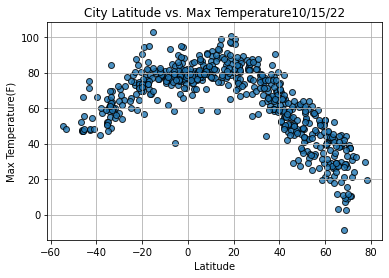

In [39]:
# Import time module
import time

# Build the scatter plot for latitudde vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

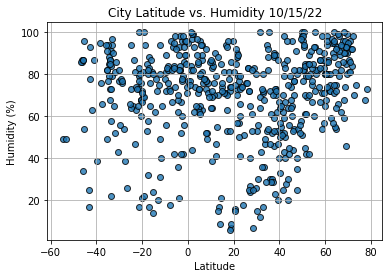

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

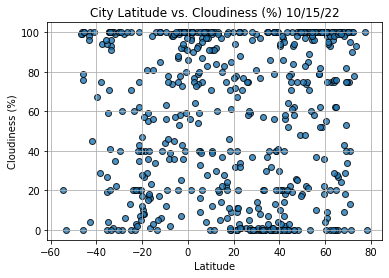

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

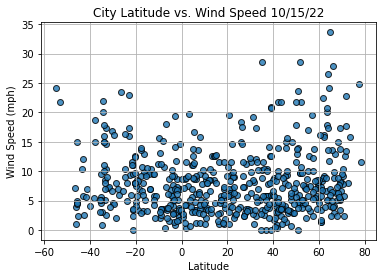

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()